___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8) # Set default figure size

In [168]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [169]:
strategy = tf.distribute.TPUStrategy(resolver)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# !pip install --upgrade seaborn
# !pip install --upgrade pandas
# !pip install --upgrade numpy
# !pip install --upgrade matplotlib==3.7.1
print("seaborn version", sns.__version__)
print("matlpotlib version", matplotlib.__version__)

seaborn version 0.12.2
matlpotlib version 3.7.1


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Womens Clothing E-Commerce Reviews.csv")
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [9]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [12]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


<Axes: xlabel='Age', ylabel='Count'>

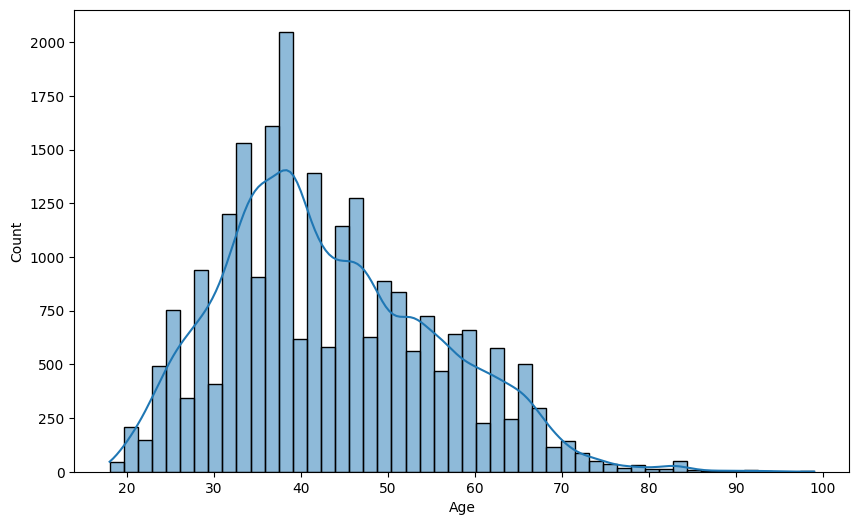

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df.Age, bins=50, kde=True)

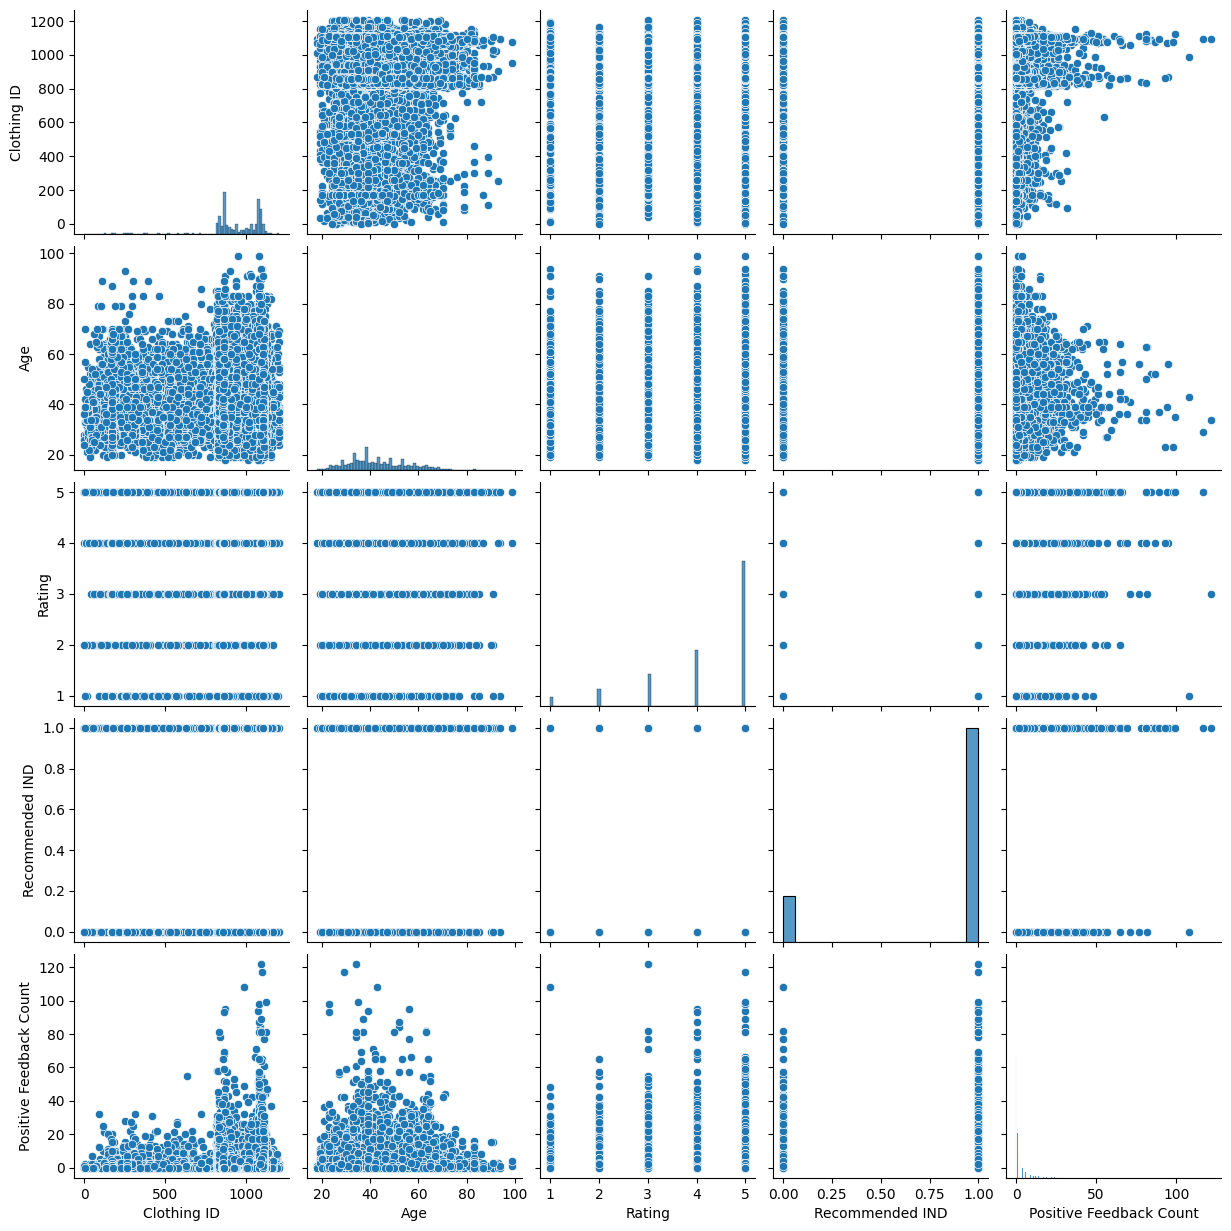

In [14]:
sns.pairplot(df)
plt.show();

In [15]:
df.corr()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Clothing ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


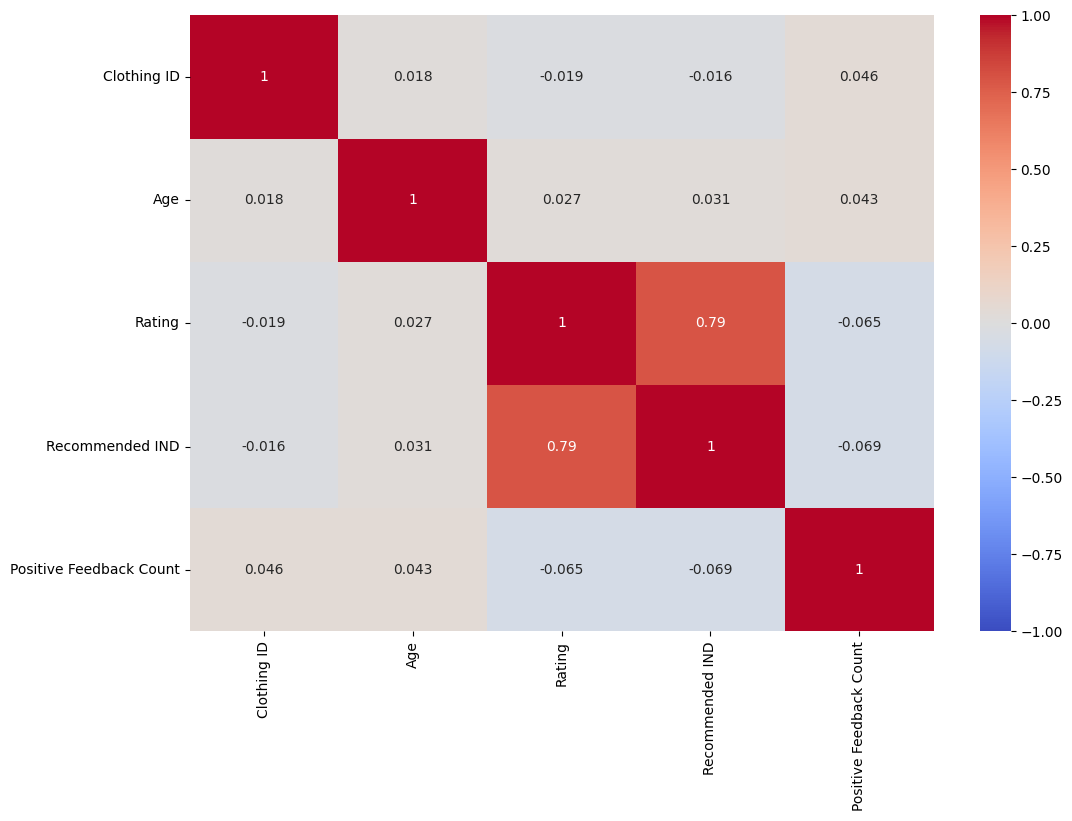

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show();

In [17]:
#sns.swarmplot(data=df['Age'])
#plt.title('Sentiment vs Length')
#plt.show()

In [18]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [19]:
#plotPerColumnDistribution(df, any, any)

### Data Wrangling

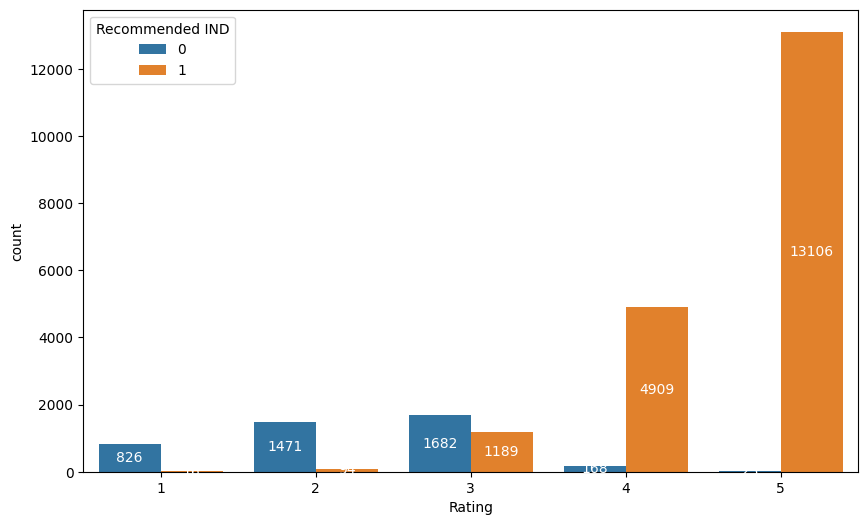

In [20]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Rating', data=df, hue='Recommended IND')

for p in ax.containers:
    ax.bar_label(p, label_type='center', color='white')

In [21]:
df["Recommended IND"].unique()

array([1, 0])

In [22]:
len(df)

23486

In [23]:
len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)])

16

In [24]:
len(df[df["Rating"] == 1]) & (df["Recommended IND"] == 1)

0        False
1        False
2        False
3        False
4        False
         ...  
23481    False
23482    False
23483    False
23484    False
23485    False
Name: Recommended IND, Length: 23486, dtype: bool

In [25]:
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])

23470

In [26]:
conditions = [
    (df["Rating"] == 1) & (df["Recommended IND"] == 1),
    (df["Rating"] == 2) & (df["Recommended IND"] == 1),
    (df["Rating"] == 3) & (df["Recommended IND"] == 1),
    (df["Rating"] == 4) & (df["Recommended IND"] == 0),
    (df["Rating"] == 5) & (df["Recommended IND"] == 0)
]

df = df[~pd.concat(conditions, axis=1).any(axis=1)]

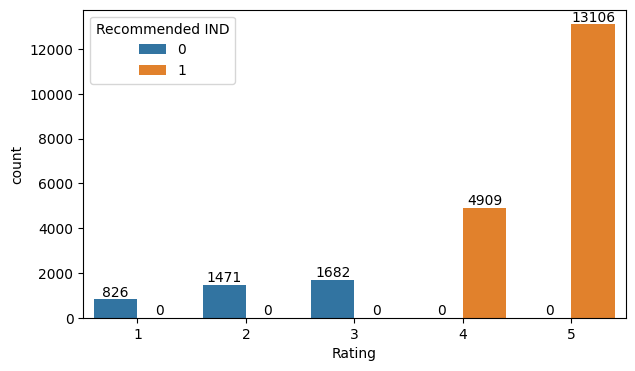

In [27]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

[Text(0, 0, '3979'), Text(0, 0, '0')]

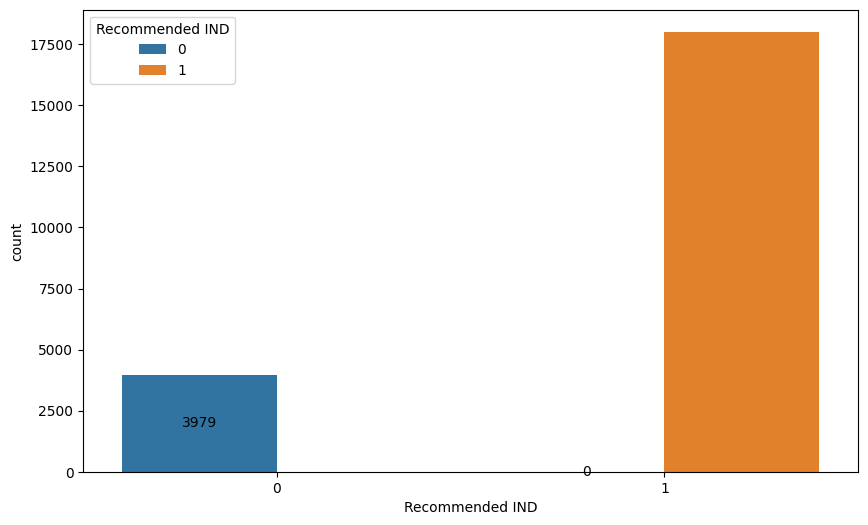

In [28]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Recommended IND', data=df, hue='Recommended IND')
ax.bar_label(ax.containers[0], label_type='center')

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [29]:
df.rename(columns={'Review Text':"text" , 'Recommended IND': "label"}, inplace=True)

In [30]:
df.head()

,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [31]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [32]:
df.isnull().sum()

text     819
label      0
dtype: int64

In [33]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


[Text(0, 0, '3914'), Text(0, 0, '17261')]

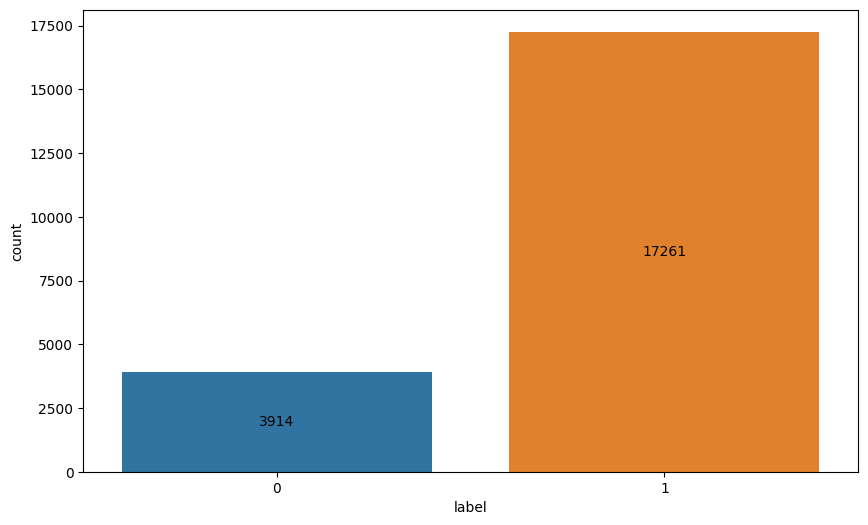

In [34]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='label', data=df)
ax.bar_label(ax.containers[0], label_type='center')

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [35]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [36]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [37]:
stop_words = set(stopwords.words('english'))

for i in ["not", "no"]:
    stop_words.remove(i)

In [38]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [39]:
positive_sentences = df[df['label'] == 1]['text']
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 17261, dtype: object

In [40]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun donset want pair...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [41]:
positive_words = " ".join(positive_sentences)
positive_words[:500]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh '

In [42]:
negative_words = " ".join(negative_sentences)
negative_words[:500]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would ta'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [43]:
from wordcloud import WordCloud

In [44]:
wordcloud_positive = WordCloud(background_color="black", max_words =250, scale=3)

In [45]:
wordcloud_positive.generate(positive_words)

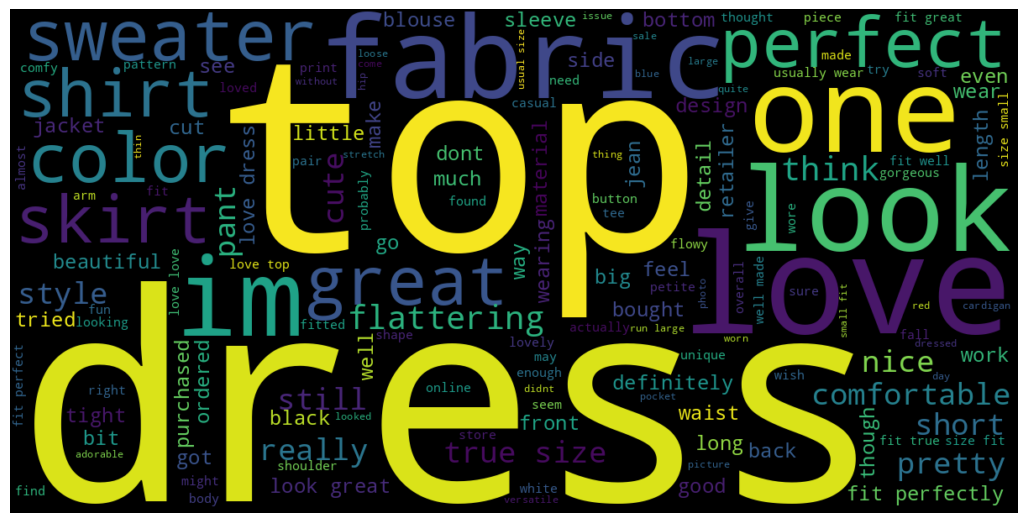

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive,
           interpolation="bilinear")
plt.axis("off")
plt.show()

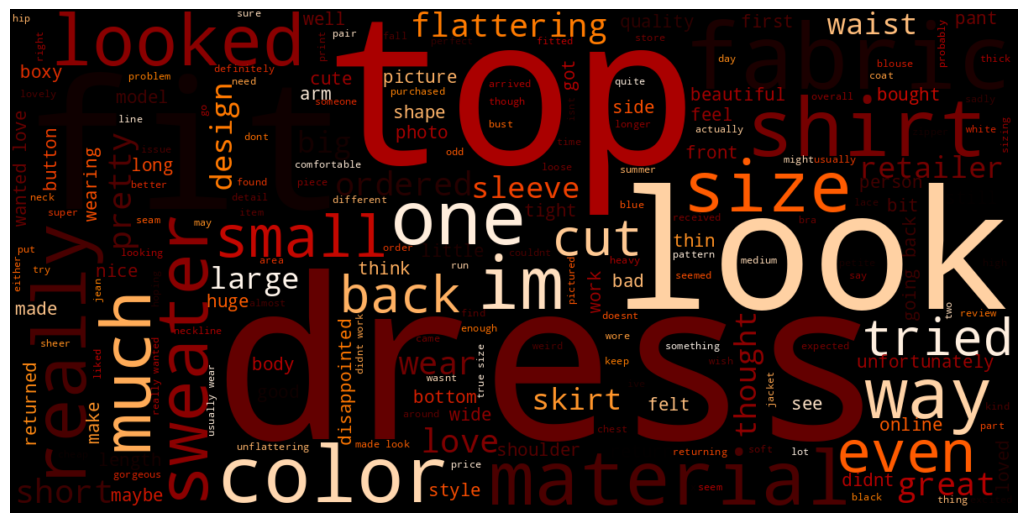

In [47]:
wordcloud_negative = WordCloud(background_color="black",
                               max_words=250,
                               colormap='gist_heat',
                               scale=3)

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative,
           interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
vectorizer = CountVectorizer(preprocessor=cleaning,
                             min_df=3,
                             max_df=0.90)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [53]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=2, max_df=0.8)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [57]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
pd.DataFrame(X_train_tf_idf.toarray(),
             columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abou,...,zero,zigzag,zillion,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [59]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [60]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [61]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.01,
                         max_iter=1000,
                         class_weight= "balanced",
                         random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [62]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1484  243]
 [  52  339]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.58      0.87      0.70       391

    accuracy                           0.86      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.90      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.63      0.90      0.74      3523

    accuracy                           0.88     19057
   macro avg       0.80      0.89      0.83     19057
weighted avg       0.91      0.88      0.89     19057



In [63]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01,
                           max_iter=1000,
                           class_weight= "balanced",
                           random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.873906
train_accuracy     0.884131
test_f1            0.719061
train_f1           0.741943
test_recall        0.872542
train_recall       0.901000
test_precision     0.611845
train_precision    0.630623
dtype: float64

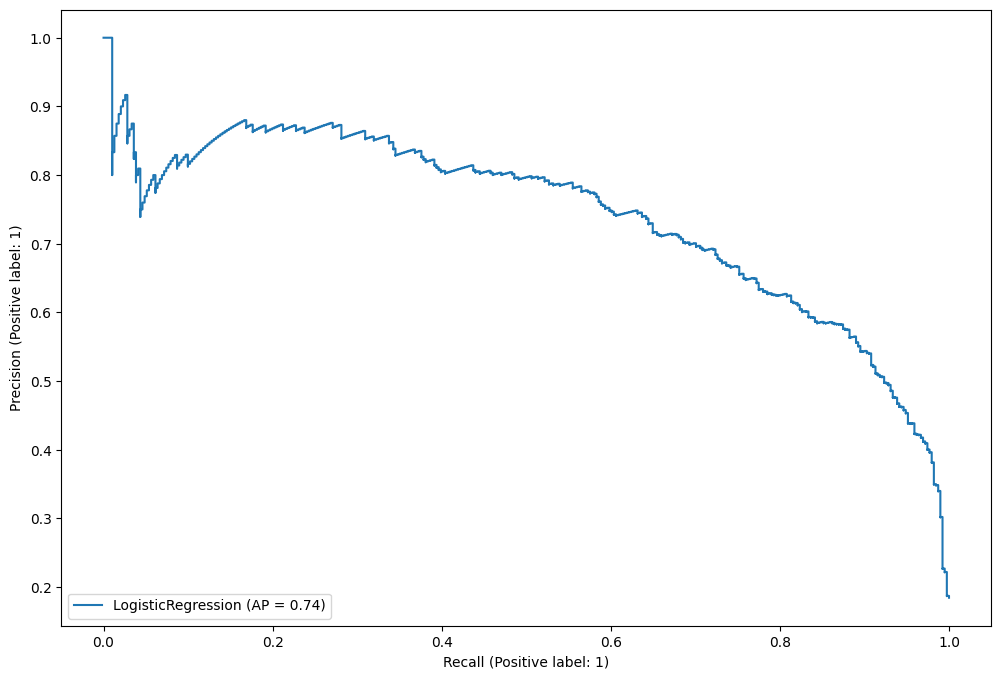

In [64]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log,
                                      X_test_count,
                                      y_test);

# PrecisionRecallDisplay.from_prediction(y_test, y_pred);

In [65]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [66]:
log = LogisticRegression(C=0.06,
                         max_iter=1000,
                         random_state=101,
                         class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [67]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1464  263]
 [  50  341]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1727
           1       0.56      0.87      0.69       391

    accuracy                           0.85      2118
   macro avg       0.77      0.86      0.79      2118
weighted avg       0.89      0.85      0.86      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     15534
           1       0.61      0.91      0.73      3523

    accuracy                           0.88     19057
   macro avg       0.79      0.89      0.82     19057
weighted avg       0.91      0.88      0.88     19057



In [68]:
model = LogisticRegression(C=0.06,
                           max_iter=1000,
                           random_state=101,
                           class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.866874
train_accuracy     0.874966
test_f1            0.709837
train_f1           0.728219
test_recall        0.880781
train_recall       0.906109
test_precision     0.594712
train_precision    0.608717
dtype: float64

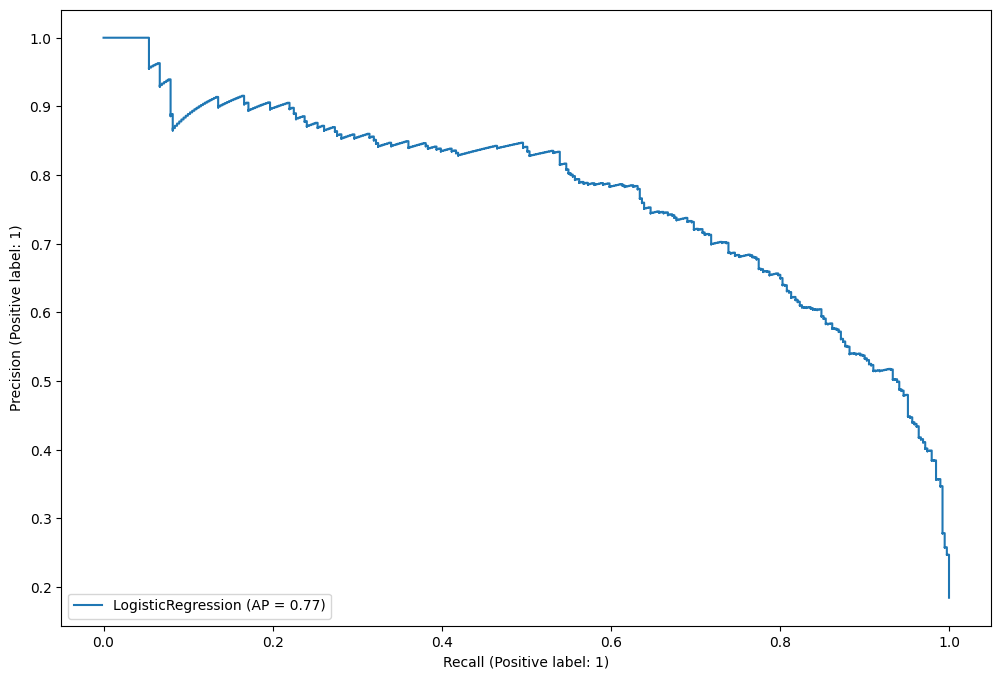

In [69]:
PrecisionRecallDisplay.from_estimator(log,
                                      X_test_tf_idf,
                                      y_test);

In [70]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [71]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [72]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1609  118]
 [  78  313]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1727
           1       0.73      0.80      0.76       391

    accuracy                           0.91      2118
   macro avg       0.84      0.87      0.85      2118
weighted avg       0.91      0.91      0.91      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.76      0.84      0.80      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.89      0.87     19057
weighted avg       0.93      0.92      0.92     19057



In [73]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.906439
train_accuracy     0.922577
test_f1            0.757743
train_f1           0.799851
test_recall        0.791652
train_recall       0.836818
test_precision     0.726964
train_precision    0.766018
dtype: float64

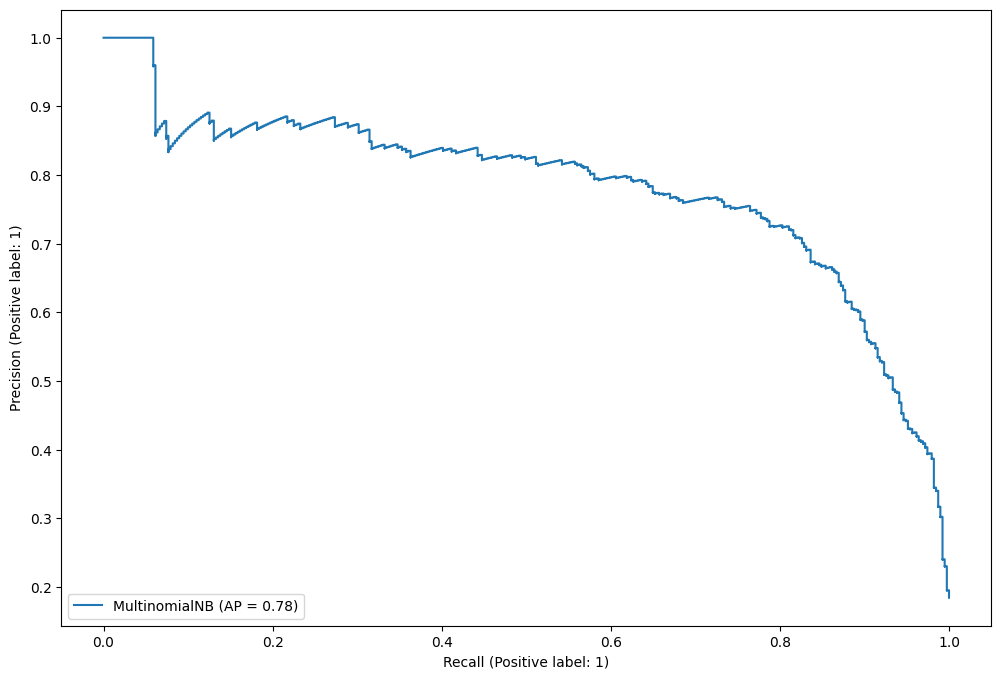

In [74]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_count,
                                      y_test);

In [75]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [76]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [77]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1595  132]
 [  87  304]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1727
           1       0.70      0.78      0.74       391

    accuracy                           0.90      2118
   macro avg       0.82      0.85      0.84      2118
weighted avg       0.90      0.90      0.90      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.76      0.83      0.79      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.89      0.87     19057
weighted avg       0.92      0.92      0.92     19057



In [78]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy      0.900299
train_accuracy     0.920811
test_f1            0.742396
train_f1           0.795243
test_recall        0.776898
train_recall       0.831835
test_precision     0.711102
train_precision    0.761742
dtype: float64

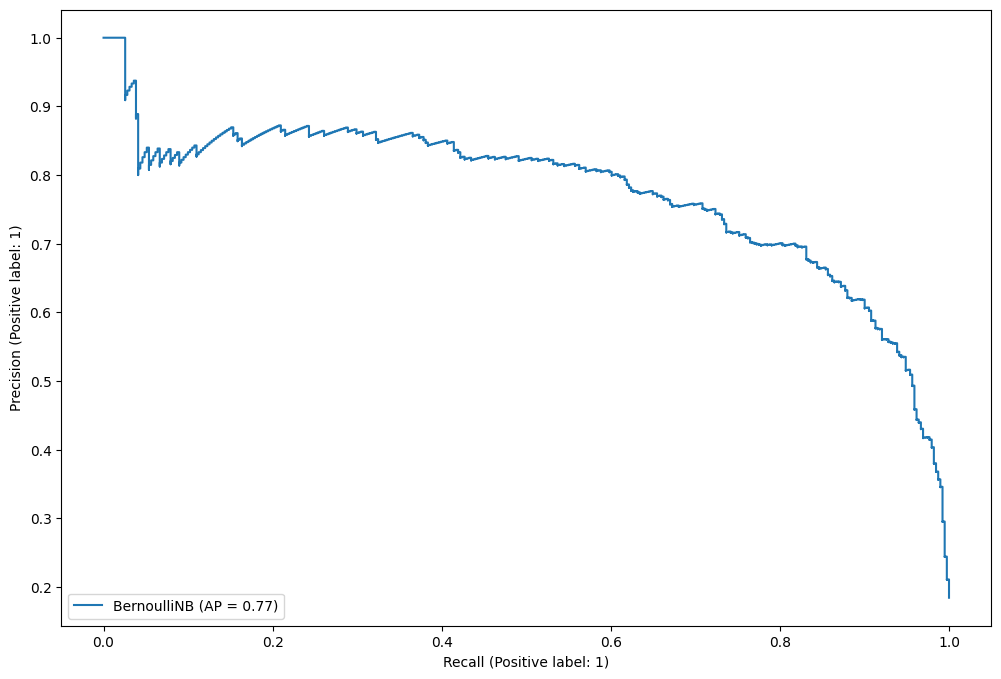

In [79]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_tf_idf,
                                      y_test);

In [80]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [81]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001,
                class_weight="balanced",
                random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [82]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1484  243]
 [  53  338]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.58      0.86      0.70       391

    accuracy                           0.86      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.89      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.64      0.90      0.75      3523

    accuracy                           0.89     19057
   macro avg       0.81      0.89      0.84     19057
weighted avg       0.91      0.89      0.89     19057



In [83]:
model = LinearSVC(C=0.001,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.874902
train_accuracy     0.885612
test_f1            0.720888
train_f1           0.745156
test_recall        0.873676
train_recall       0.904595
test_precision     0.613916
train_precision    0.633506
dtype: float64

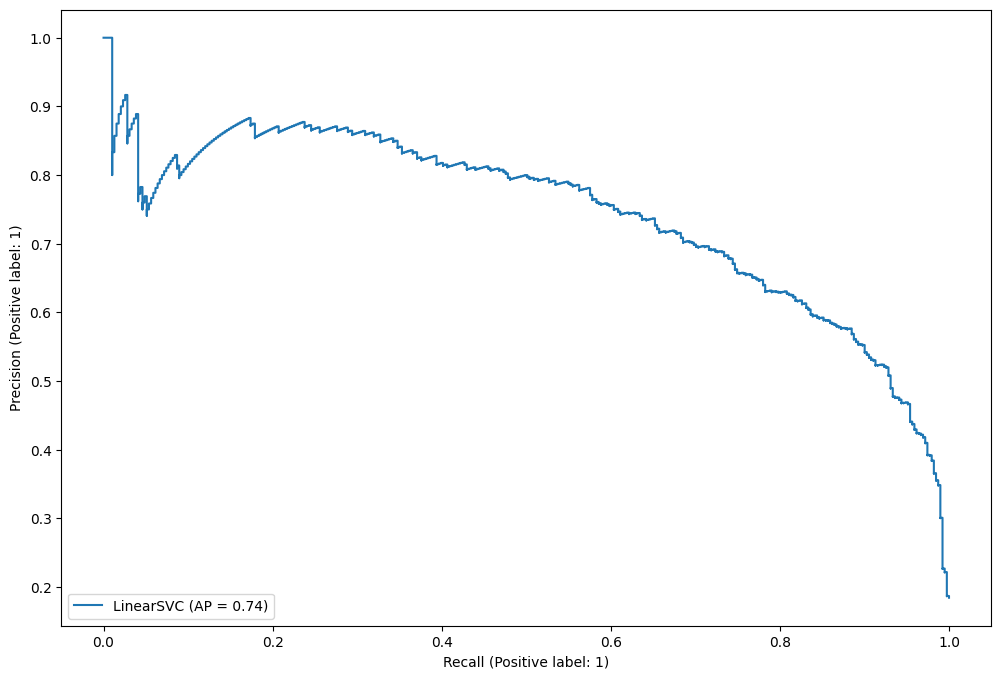

In [84]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_count,
                                      y_test);

In [85]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [86]:
svc = LinearSVC(C=0.03,
                class_weight="balanced",
                random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [87]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1497  230]
 [  40  351]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1727
           1       0.60      0.90      0.72       391

    accuracy                           0.87      2118
   macro avg       0.79      0.88      0.82      2118
weighted avg       0.91      0.87      0.88      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     15534
           1       0.66      0.93      0.78      3523

    accuracy                           0.90     19057
   macro avg       0.82      0.91      0.86     19057
weighted avg       0.92      0.90      0.91     19057



In [88]:
model = LinearSVC(C=0.03,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883613
train_accuracy     0.899302
test_f1            0.738047
train_f1           0.774305
test_recall        0.886451
train_recall       0.934368
test_precision     0.632615
train_precision    0.661063
dtype: float64

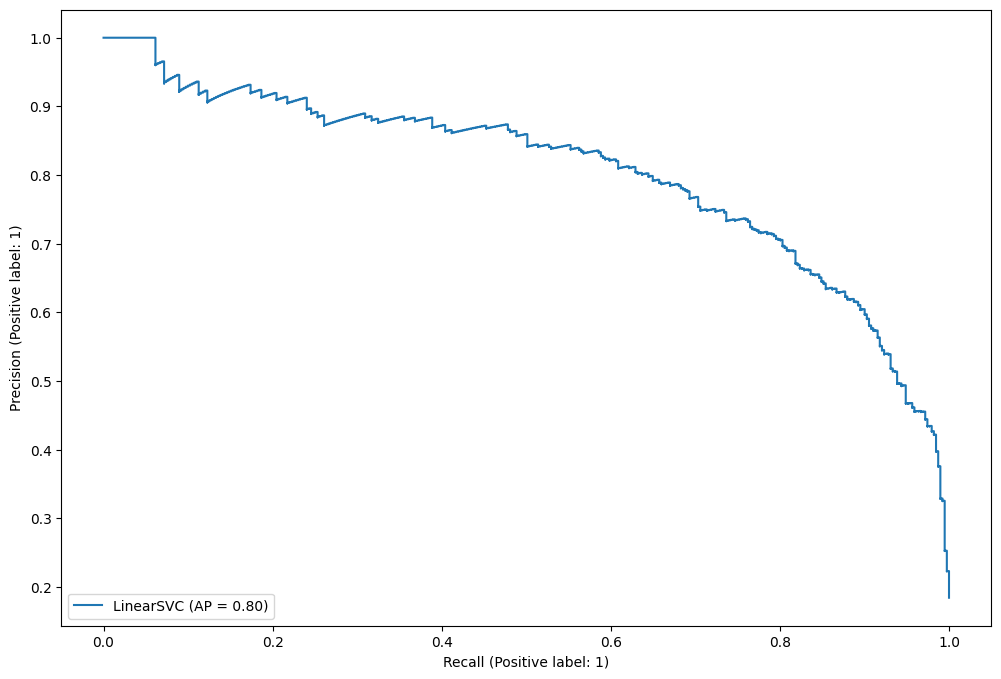

In [89]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_tf_idf,
                                      y_test);

In [90]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [92]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1458  269]
 [  61  330]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1727
           1       0.55      0.84      0.67       391

    accuracy                           0.84      2118
   macro avg       0.76      0.84      0.78      2118
weighted avg       0.88      0.84      0.86      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     15534
           1       0.60      0.88      0.71      3523

    accuracy                           0.87     19057
   macro avg       0.78      0.87      0.81     19057
weighted avg       0.90      0.87      0.88     19057



In [93]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.853755
train_accuracy     0.870453
test_f1            0.676497
train_f1           0.712555
test_recall        0.826562
train_recall       0.868105
test_precision     0.572841
train_precision    0.604452
dtype: float64

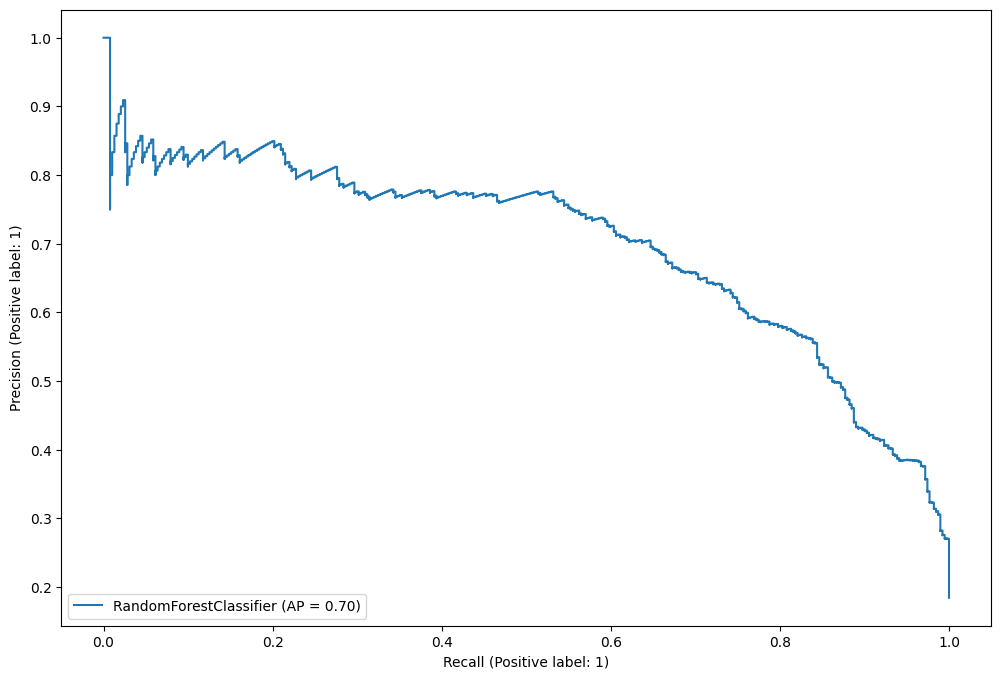

In [94]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_count,
                                      y_test);

In [95]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [96]:
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [97]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1428  299]
 [  61  330]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1727
           1       0.52      0.84      0.65       391

    accuracy                           0.83      2118
   macro avg       0.74      0.84      0.77      2118
weighted avg       0.88      0.83      0.84      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     15534
           1       0.58      0.88      0.70      3523

    accuracy                           0.86     19057
   macro avg       0.78      0.87      0.81     19057
weighted avg       0.90      0.86      0.87     19057



In [98]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.845464
train_accuracy     0.866436
test_f1            0.665875
train_f1           0.709814
test_recall        0.831668
train_recall       0.882960
test_precision     0.555590
train_precision    0.593714
dtype: float64

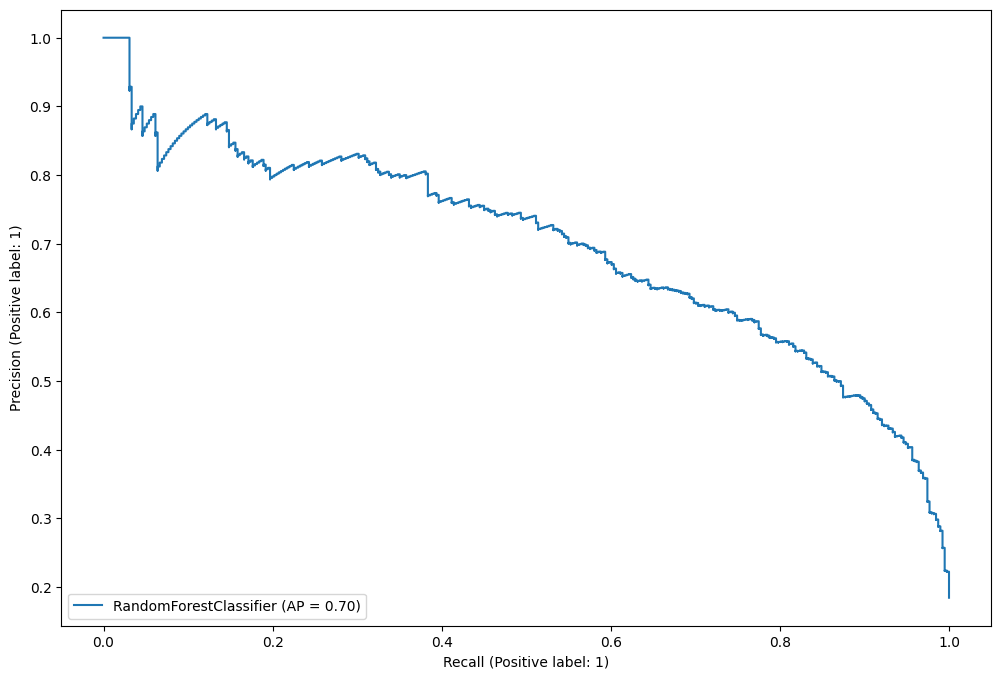

In [99]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_tf_idf,
                                      y_test);

In [100]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [101]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [102]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1638   89]
 [ 168  223]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1727
           1       0.71      0.57      0.63       391

    accuracy                           0.88      2118
   macro avg       0.81      0.76      0.78      2118
weighted avg       0.87      0.88      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     15534
           1       0.77      0.61      0.68      3523

    accuracy                           0.89     19057
   macro avg       0.84      0.78      0.81     19057
weighted avg       0.89      0.89      0.89     19057



In [103]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.889175
train_accuracy     0.894008
test_f1            0.663536
train_f1           0.678427
test_recall        0.591257
train_recall       0.604820
test_precision     0.756811
train_precision    0.772458
dtype: float64

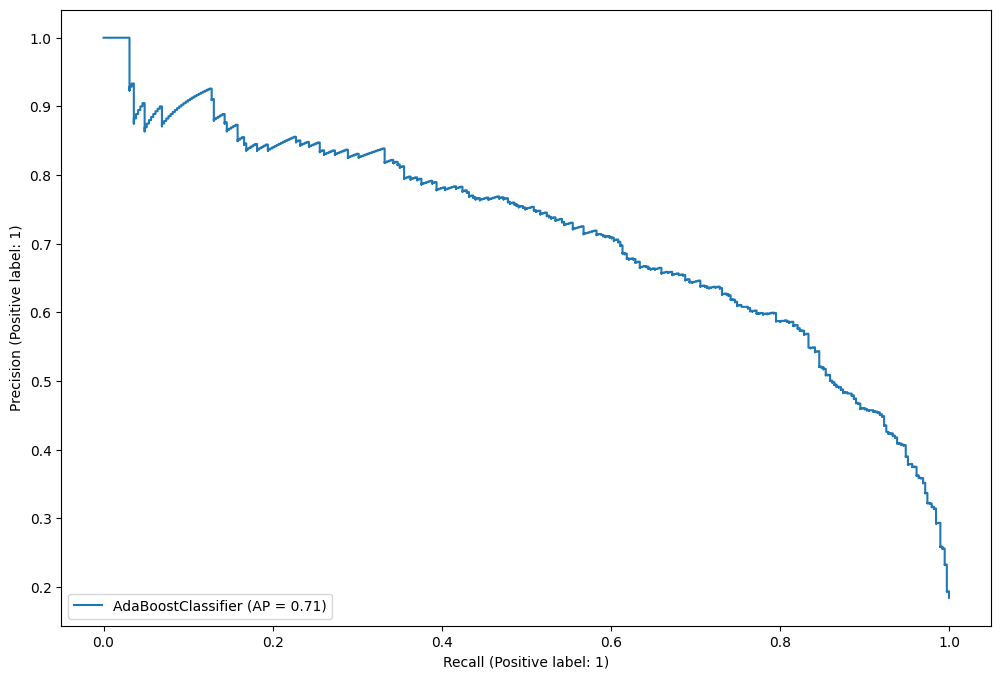

In [104]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_count,
                                      y_test);

In [105]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [106]:
ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42,
                         learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [107]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1662   65]
 [ 198  193]]
Test_Set
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1727
           1       0.75      0.49      0.59       391

    accuracy                           0.88      2118
   macro avg       0.82      0.73      0.76      2118
weighted avg       0.87      0.88      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     15534
           1       0.82      0.55      0.66      3523

    accuracy                           0.89     19057
   macro avg       0.86      0.76      0.80     19057
weighted avg       0.89      0.89      0.89     19057



In [108]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42,
                           learning_rate=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.885607
train_accuracy     0.894579
test_f1            0.628751
train_f1           0.660136
test_recall        0.524272
train_recall       0.553821
test_precision     0.786228
train_precision    0.816972
dtype: float64

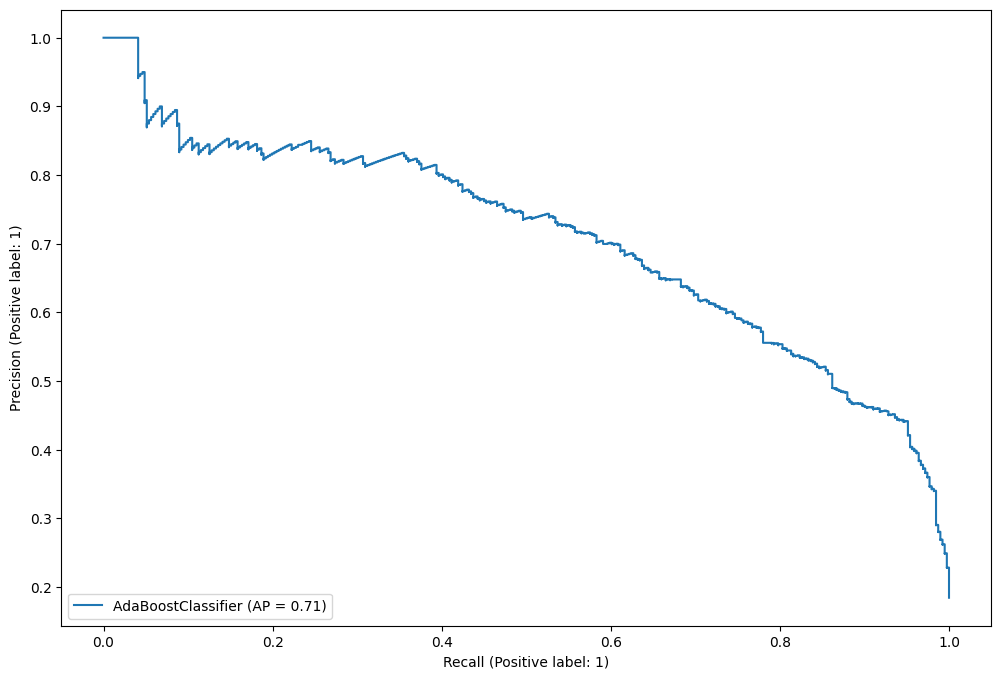

In [109]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_tf_idf,
                                      y_test);

In [110]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [111]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "I was very happy to snag this dress at such a great price! it's very easy to slip on an

### Tokenization

In [112]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [113]:
tokenizer.fit_on_texts(X)

### Creating word index

In [114]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [115]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [116]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [117]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [118]:
num_tokens.mean()

60.2330106257379

In [119]:
num_tokens.max()

116

In [120]:
max_tokens = 116

In [121]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [122]:
X_pad = pad_sequences(X_num_tokens,
                      maxlen = max_tokens)

In [123]:
X_pad.shape

(21175, 116)

### Train Set Split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

### Modeling

In [125]:
model = Sequential()
embedding_size = 50
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [126]:
optimizer = Adam(learning_rate=0.001)

In [127]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [129]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2,
                           restore_best_weights=True)

In [130]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61339642, 2.70465512])

In [131]:
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
149/149 [==============================] - 29s 149ms/step - loss: 0.4582 - recall: 0.7241 - val_loss: 0.3164 - val_recall: 0.8926
Epoch 2/10
149/149 [==============================] - 21s 139ms/step - loss: 0.2516 - recall: 0.9228 - val_loss: 0.2275 - val_recall: 0.7775
Epoch 3/10
149/149 [==============================] - 21s 140ms/step - loss: 0.1906 - recall: 0.9483 - val_loss: 0.2814 - val_recall: 0.8875
Epoch 3: early stopping


### Model Evaluation

In [132]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.458170,0.724099,0.316371,0.892583
1,0.251580,0.922793,0.227512,0.777494
2,0.190563,0.948339,0.281369,0.887468


<Axes: >

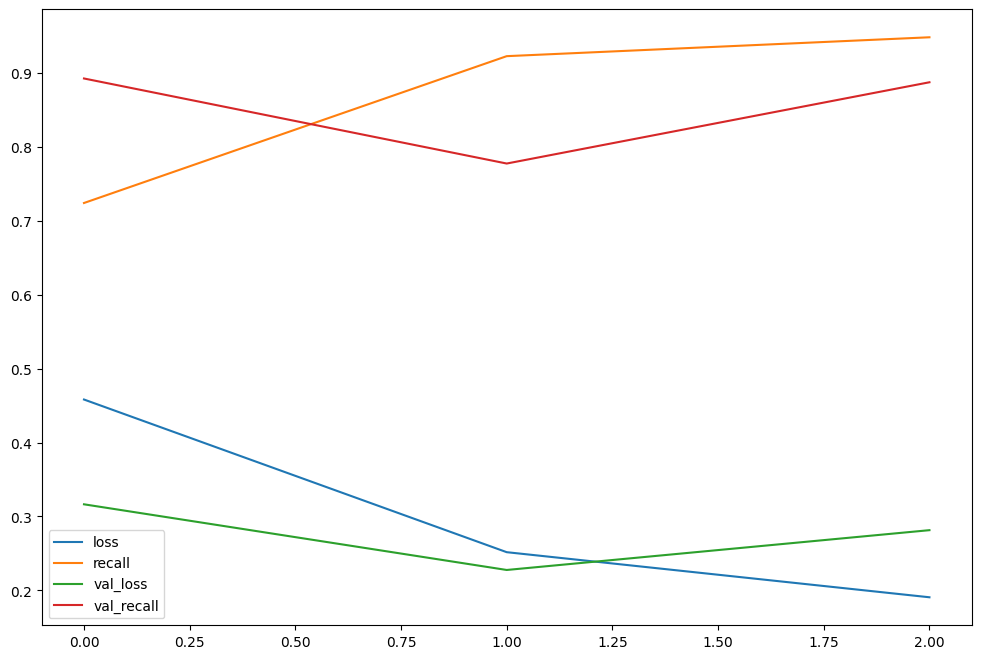

In [133]:
model_loss.plot()

In [134]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 3s 24ms/step
[[1488  239]
 [  42  349]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.59      0.89      0.71       391

    accuracy                           0.87      2118
   macro avg       0.78      0.88      0.81      2118
weighted avg       0.90      0.87      0.88      2118



In [135]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 12s 19ms/step
[[13608  1926]
 [  201  3322]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     15534
           1       0.63      0.94      0.76      3523

    accuracy                           0.89     19057
   macro avg       0.81      0.91      0.84     19057
weighted avg       0.92      0.89      0.90     19057



67/67 [==============================] - 1s 20ms/step


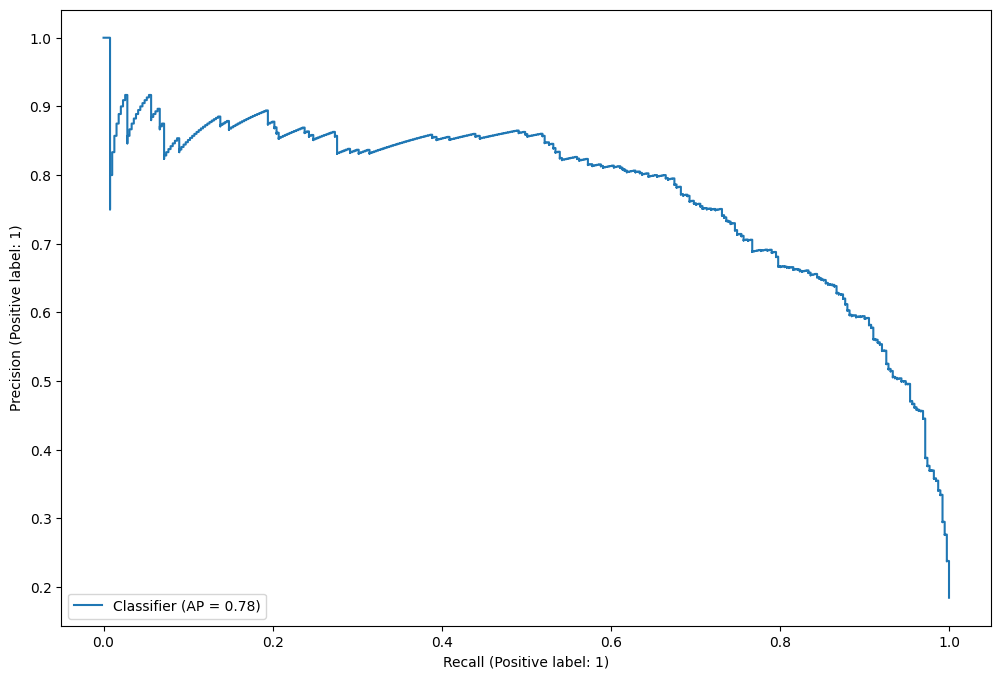

In [136]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


In [137]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.776784148583307

In [138]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [139]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.9 MB/s eta 0:00:00


### Read Data

### Train test split

### Tokenization

In [140]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "I was very happy to snag this dress at such a great price! it's very easy to slip on an

In [141]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  162


In [142]:
np.array(num_of_sent_tokens).mean()

76.31556080283353

In [143]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

In [144]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

In [145]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [146]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2001, ...,    0,    0,    0],
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [147]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

### Fixing token counts of all documents

In [148]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [149]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [150]:
Xids_train


array([[ 101, 2025, 2469, ...,    0,    0,    0],
       [ 101, 3504, 2428, ...,    0,    0,    0],
       [ 101, 2023, 2003, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2293, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 1996, 6302, ...,    0,    0,    0]])

In [151]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)


Xids_train.shape  : (19057, 162)
Xmask_train.shape : (19057, 162)
Xids_test.shape   : (2118, 162)
Xmask_test.shape  : (2118, 162)


### Transformation Vectors to Matrices

In [152]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [153]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [154]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [155]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [156]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [157]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [158]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [159]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [160]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


In [161]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 695.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 24.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does 

In [162]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [163]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1192
119


### Creating optimization

### Creating Model with TPU

In [164]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [170]:
with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [171]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                         

### Model Fiting

In [172]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/2
596/596 [==============================] - 240s 198ms/step - loss: 0.5054 - recall_2: 0.8674 - val_loss: 0.2471 - val_recall_2: 0.8363
Epoch 2/2
596/596 [==============================] - 62s 104ms/step - loss: 0.3948 - recall_2: 0.9024 - val_loss: 0.6562 - val_recall_2: 0.9463


### Model evaluation

In [173]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall_2,val_loss,val_recall_2
0,0.505394,0.867443,0.247080,0.836317
1,0.394765,0.902356,0.656181,0.946292


<Axes: >

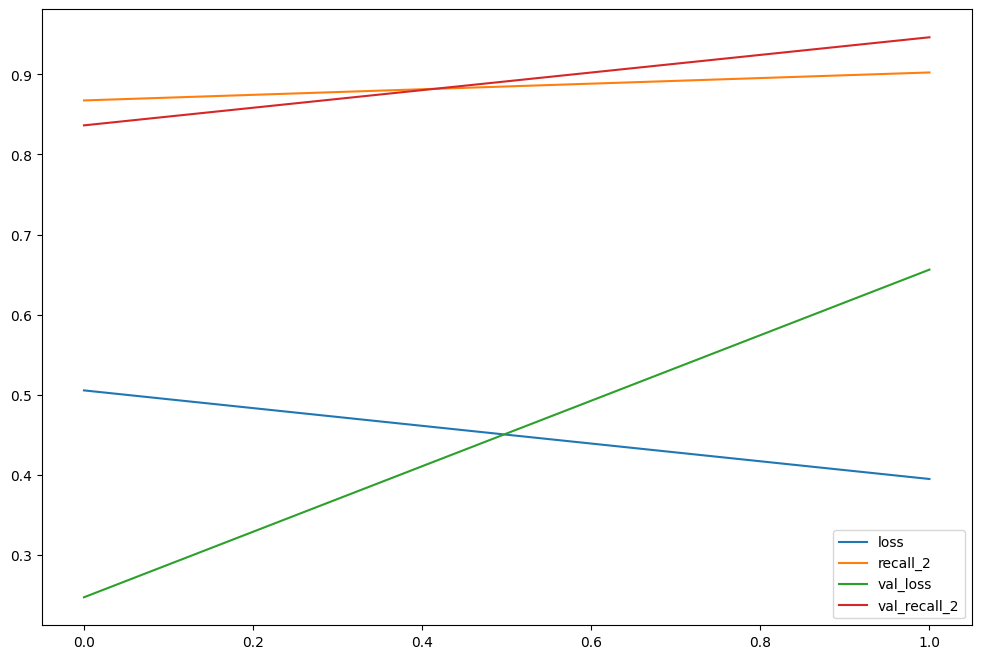

In [174]:
model_loss.plot()

In [175]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

67/67 [==============================] - 16s 164ms/step
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1727
           1       0.69      0.95      0.80       391

    accuracy                           0.91      2118
   macro avg       0.84      0.92      0.87      2118
weighted avg       0.93      0.91      0.92      2118



In [176]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

596/596 [==============================] - 24s 38ms/step
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     15534
           1       0.79      0.98      0.87      3523

    accuracy                           0.95     19057
   macro avg       0.89      0.96      0.92     19057
weighted avg       0.96      0.95      0.95     19057



67/67 [==============================] - 4s 33ms/step


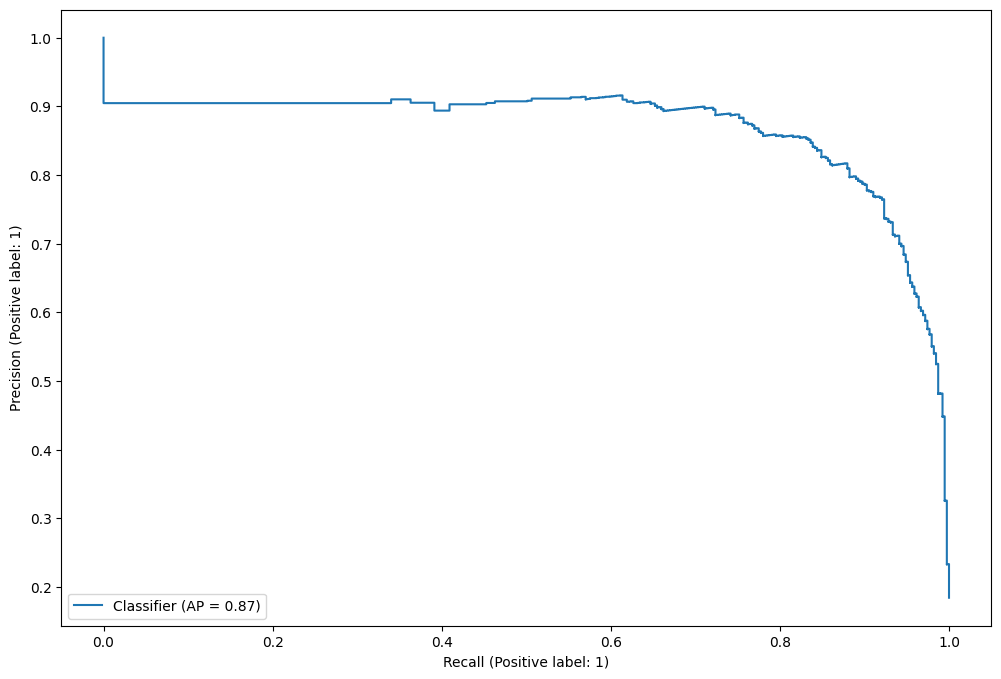

In [177]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [178]:
average_precision_score(y_test2, y_pred_proba)

0.8692871059946892

In [182]:
BERT_AP = average_precision_score(y_test2, y_pred_proba)
BERT_f1 = f1_score(y_test2, y_pred)
BERT_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

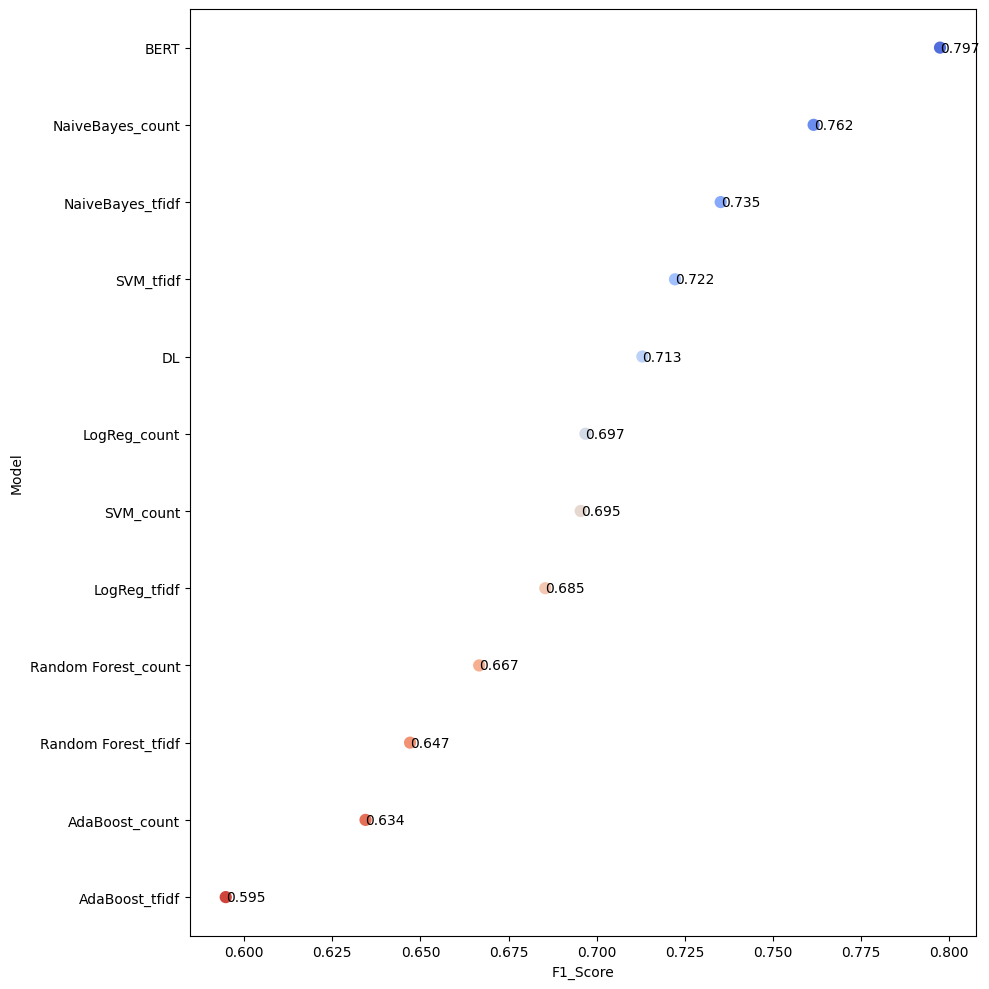

In [187]:
# Create DataFrame
model_names = ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
               "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
               "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT"]

f1_scores = [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1,
             nb_tfidf_f1, log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_f1]

compare_f1 = pd.DataFrame({
    "Model": model_names,
    "F1_Score": f1_scores
})

# Plotting F1 Scores
plt.figure(figsize=(10, 10))
compare_sorted = compare_f1.sort_values(by="F1_Score", ascending=False)
ax = sns.pointplot(y="Model", x="F1_Score", data=compare_sorted, palette="coolwarm", join=False)

# Adding value labels to the dots
for index, value in enumerate(compare_sorted["F1_Score"]):
    ax.text(value, index, f'{value:.3f}', color='black', va='center')

plt.tight_layout()
plt.show()


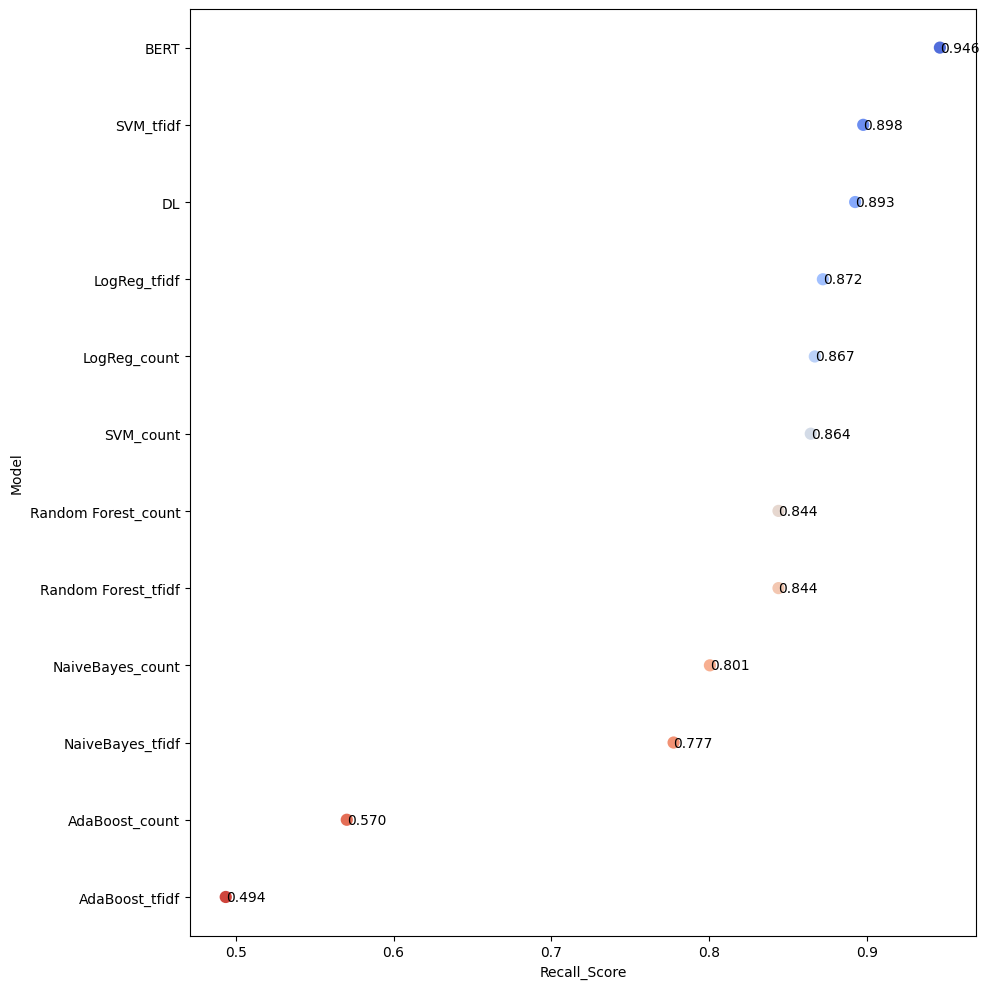

In [188]:
recall_scores = [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec,
                 nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_rec]

compare_recall = pd.DataFrame({
    "Model": model_names,
    "Recall_Score": recall_scores
})

# Plotting Recall Scores
plt.figure(figsize=(10, 10))
compare_sorted = compare_recall.sort_values(by="Recall_Score", ascending=False)
ax = sns.pointplot(y="Model", x="Recall_Score", data=compare_sorted, palette="coolwarm", join=False)

# Adding value labels to the dots
for index, value in enumerate(compare_sorted["Recall_Score"]):
    ax.text(value, index, f'{value:.3f}', color='black', va='center')

plt.tight_layout()
plt.show()


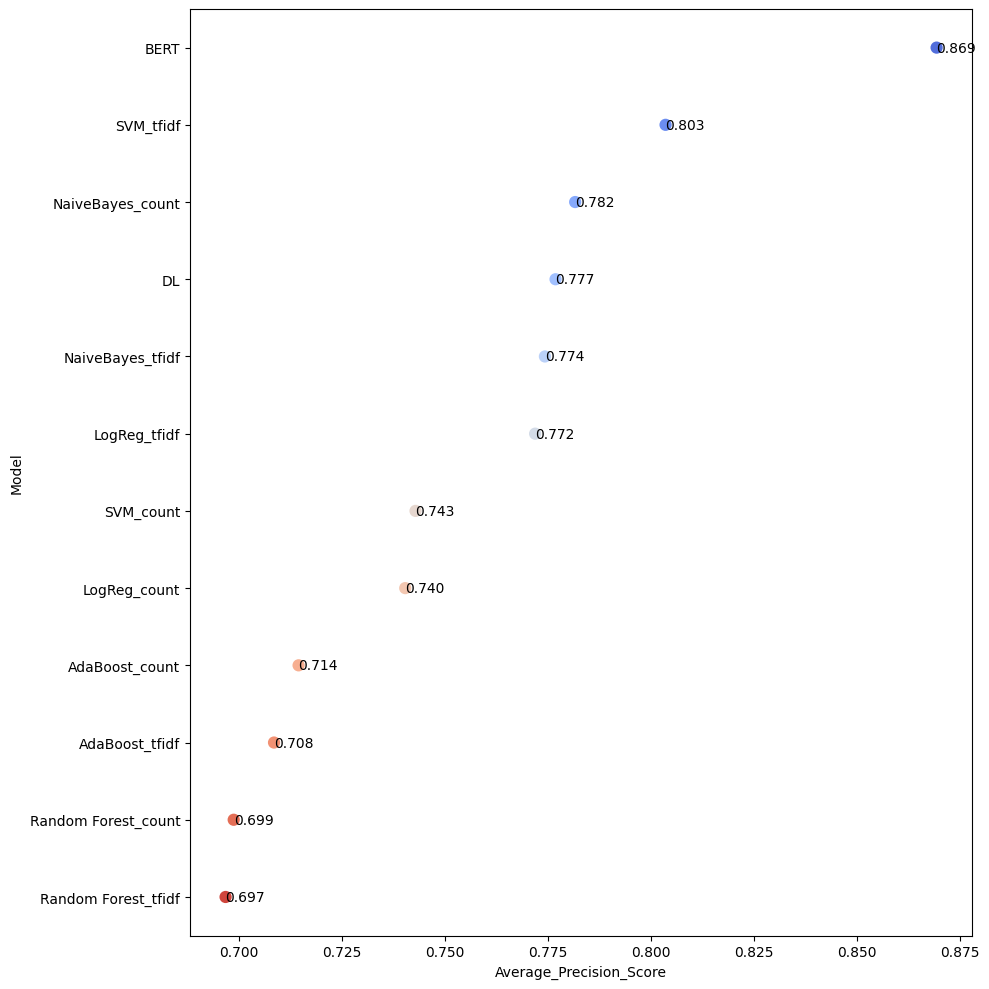

In [189]:
avg_precision_scores = [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count,
                        nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_AP]

compare_avg_precision = pd.DataFrame({
    "Model": model_names,
    "Average_Precision_Score": avg_precision_scores
})

# Plotting Average Precision Scores
plt.figure(figsize=(10, 10))
compare_sorted = compare_avg_precision.sort_values(by="Average_Precision_Score", ascending=False)
ax = sns.pointplot(y="Model", x="Average_Precision_Score", data=compare_sorted, palette="coolwarm", join=False)

# Adding value labels to the dots
for index, value in enumerate(compare_sorted["Average_Precision_Score"]):
    ax.text(value, index, f'{value:.3f}', color='black', va='center')

plt.tight_layout()
plt.show()


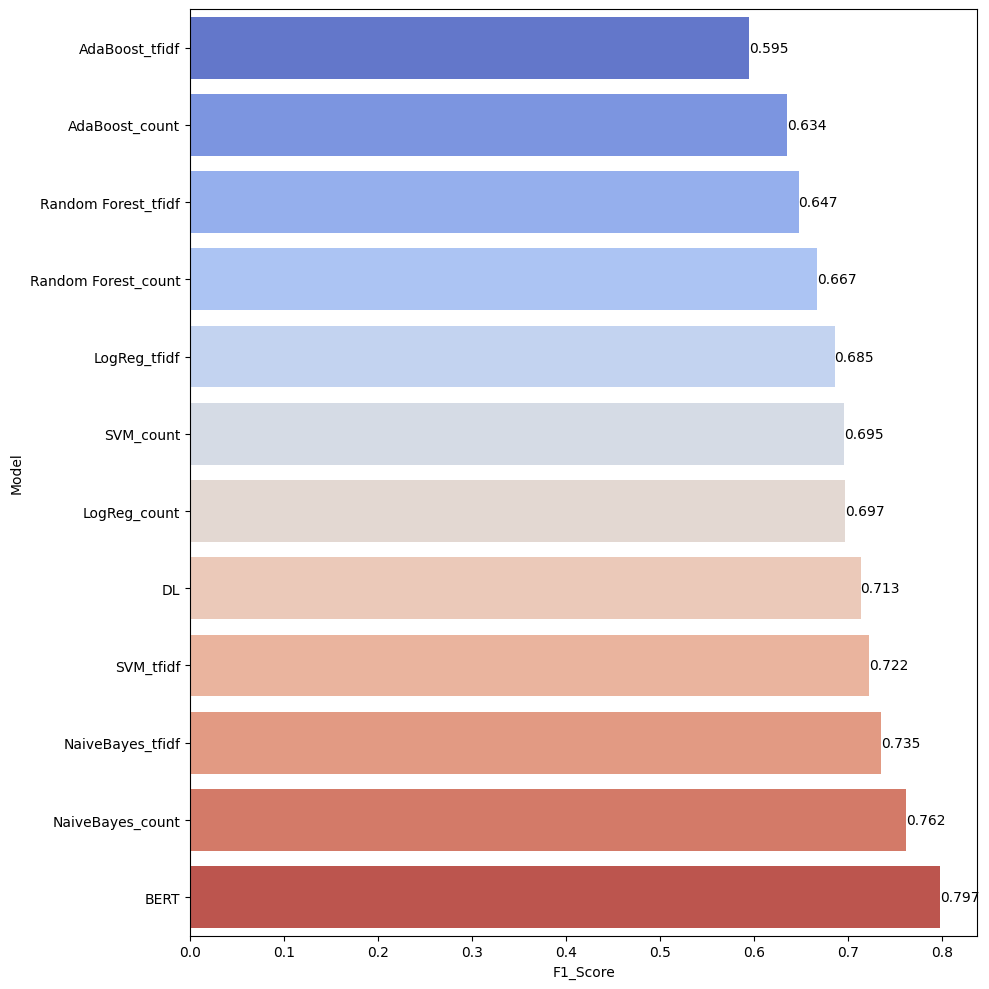

In [190]:
# Create DataFrame
model_names = ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
               "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
               "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT"]

f1_scores = [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1,
             nb_tfidf_f1, log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_f1]

compare_f1 = pd.DataFrame({
    "Model": model_names,
    "F1_Score": f1_scores
})

# Plotting F1 Scores
plt.figure(figsize=(10, 10))
compare_sorted = compare_f1.sort_values(by="F1_Score", ascending=True)
ax = sns.barplot(x="F1_Score", y="Model", data=compare_sorted, palette="coolwarm")

# Adding value labels to the bars
for index, value in enumerate(compare_sorted["F1_Score"]):
    ax.text(value, index, f'{value:.3f}', color='black', va='center')

plt.tight_layout()
plt.show()


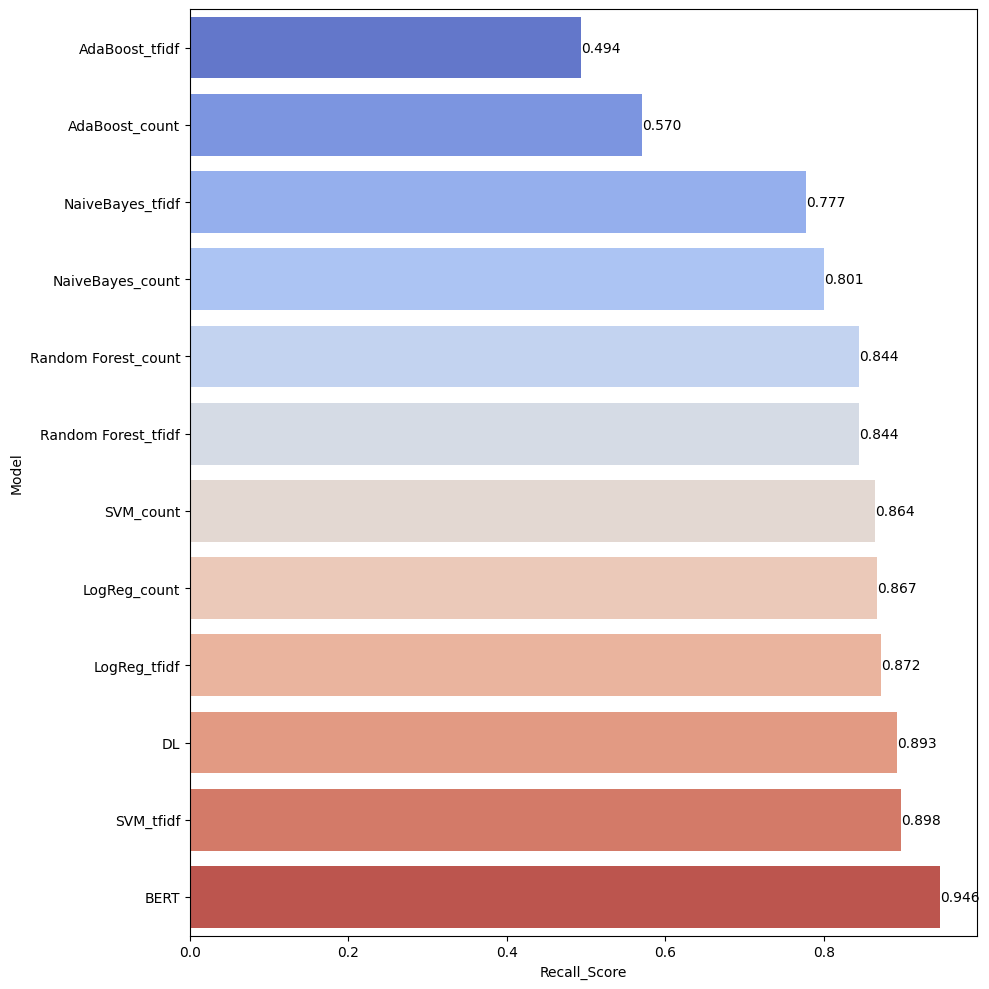

In [192]:
recall_scores = [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec,
                 nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_rec]

compare_recall = pd.DataFrame({
    "Model": model_names,
    "Recall_Score": recall_scores
})

# Plotting Recall Scores
plt.figure(figsize=(10, 10))
compare_sorted = compare_recall.sort_values(by="Recall_Score", ascending=True)
ax = sns.barplot(x="Recall_Score", y="Model", data=compare_sorted, palette="coolwarm")

# Adding value labels to the bars
for index, value in enumerate(compare_sorted["Recall_Score"]):
    ax.text(value, index, f'{value:.3f}', color='black', va='center')

plt.tight_layout()
plt.show()


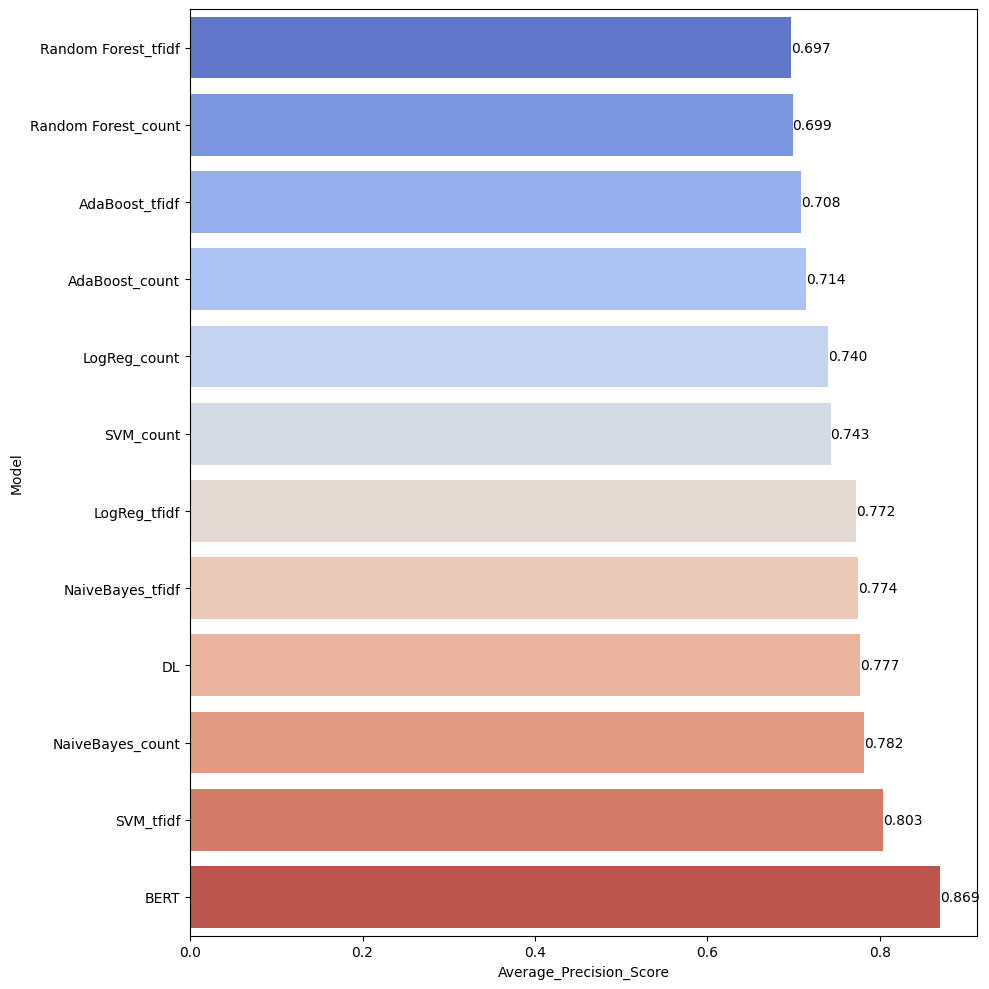

In [193]:
avg_precision_scores = [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count,
                        nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_AP]

compare_avg_precision = pd.DataFrame({
    "Model": model_names,
    "Average_Precision_Score": avg_precision_scores
})

# Plotting Average Precision Scores
plt.figure(figsize=(10, 10))
compare_sorted = compare_avg_precision.sort_values(by="Average_Precision_Score", ascending=True)
ax = sns.barplot(x="Average_Precision_Score", y="Model", data=compare_sorted, palette="coolwarm")

# Adding value labels to the bars
for index, value in enumerate(compare_sorted["Average_Precision_Score"]):
    ax.text(value, index, f'{value:.3f}', color='black', va='center')

plt.tight_layout()
plt.show()


### Conclusion

In [ ]:
The BERT Model is always the best choice :)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___